In [1]:
import sys
from pathlib import Path
parent_dir = str(Path().resolve().parent)
sys.path.append(parent_dir)

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
plt.style.use("dark_background")

# Bernoulli Distribution

## PMF and CDF of Bernoulli Distribution

```{prf:definition} Bernoulli Trials
:label: def:bernoulli_trials_1

A **Bernoulli trial** is an **experiment** with two possible outcomes: success or failure, often
denoted as 1 or 0 respectively.

The three assumptions for Bernoulli trials are:

1. Each trial has two possible outcomes: 1 or 0 (success of failure);
2. The probability of success ($p$) is constant for each trial and so is the failure ($1-p$);
3. Each trial is independent; The outcome of previous trials has no influence on any subsequent trials.

See more [here](https://www.statisticshowto.com/bernoulli-trials/).
```

```{prf:definition} Bernoulli Distribution (PMF)
:label: def_bernoulli_distribution_pmf

Let $X$ be a **Bernoulli random variable** with parameter $p$. Then the 
probability mass function (PMF) of $X$ is given by 

$$
\begin{align}
\P(X=x) = \begin{cases}
p   &\quad \text{ if } x=1 \\
1-p &\quad \text{ if } x=0 \\
0   &\quad \text{ otherwise }
\end{cases}
\end{align}
$$

where $0 \leq p \leq 1$ is called the Bernoulli parameter. 

A **Bernoulli distribution is a Bernoulli trial**.

Some conventions:

1. We denote $X \sim \bern(p)$ if $X$ follows a Bernoulli distribution with parameter $p$.
2. The states of $X$ are $x \in \{0,1\}$. This means $X$ only has two (binary) states, 0 and 1.
3. We denote $1$ as **success** and $0$ as **failure** and consequently $p$ as the probability of success
and $1-p$ as the probability of failure.
4. Bear in mind that $X$ is defined over $\pspace$, and when we say $\P \lsq X=x \rsq$, we are also saying
$\P \lsq E \rsq$ where $E \in \E$. Imagine a coin toss, $E$ is the event that the coin lands on heads,
which translates to $E = \{X=1\}$.
5. Note further that a Bernoulli Trial is a **single** experiment with only two possible outcomes.
This will be the main difference when we learn Binomial distribution (i.e. sampling 1 guy vs sampling n guys).
```

```{prf:definition} Bernoulli Distribution (CDF)
:label: def_bernoulli_distribution_cdf

Let $X$ be a **Bernoulli random variable** with parameter $p$. Then the
cumulative distribution function (CDF) of $X$ is given by

$$
\begin{align}
\cdf(x) = \begin{cases}
0   &\quad \text{ if } x < 0 \\
1-p &\quad \text{ if } 0 \leq x < 1 \\
1   &\quad \text{ if } x \geq 1
\end{cases}
\end{align}
$$

where $0 \leq p \leq 1$ is called the Bernoulli parameter.
```

## Plotting PMF and CDF of Bernoulli Distribution

The PMF and CDF plots are shown below.

Using Seed Number 42


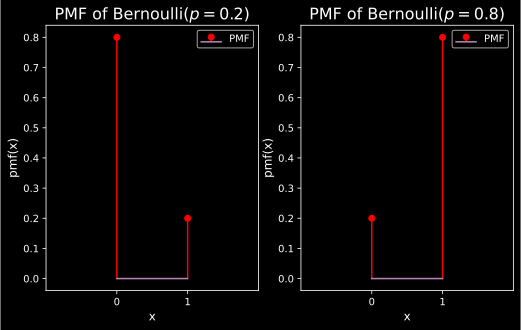

In [2]:
from plot import plot_bernoulli_pmf

_fig, axes = plt.subplots(1,2, figsize=(8.4, 4.8), dpi=300)
plot_bernoulli_pmf(p=0.2, ax=axes[0])
plot_bernoulli_pmf(p=0.8, ax=axes[1])
plt.show()

AttributeError: Rectangle.set() got an unexpected keyword argument 'density'

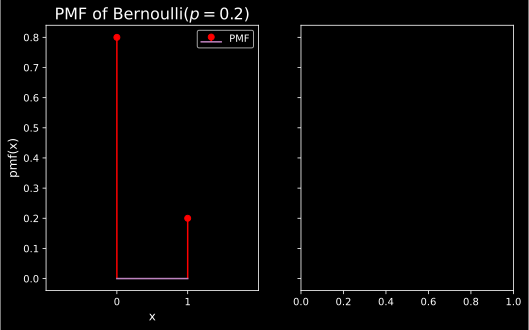

In [3]:
from plot import plot_bernoulli_pmf, plot_empirical_bernoulli

fig, axes = plt.subplots(1, 2, figsize=(8.4, 4.8), sharey=True, dpi=100)
plot_bernoulli_pmf(p=0.2, ax=axes[0])
plot_empirical_bernoulli(p=0.2, size=100, ax=axes[0])

plot_bernoulli_pmf(p=0.2, ax=axes[1])
plot_empirical_bernoulli(p=0.2, size=1000, ax=axes[1])

fig.supylabel("relative frequency")
fig.suptitle("Histogram of Bernoulli($p=0.2$) based on $100$ and $1000$ samples.")
plt.show()

## Assumptions

The three assumptions for Bernoulli trials are:

1. Each trial has two possible outcomes: 1 or 0 (success of failure);
2. The probability of success ($p$) is constant for each trial and so is the failure ($1-p$);
3. Each trial is independent; The outcome of previous trials has no influence on any subsequent trials.


## Expectation and Variance

```{prf:property} Expectation of Bernoulli Distribution
:label: prop:bernoulli

Let $X \sim \bern(p)$ be a Bernoulli random variable with parameter $p$. Then the expectation of $X$ is given by

$$
\begin{align}
\expectation \lsq X \rsq = p
\end{align}
$$
```

```{prf:proof}
The proof is as follows

$$
\sum_{x \in X(\S)} x \cdot \P(X=x) = 1 \cdot p + 0 \cdot (1-p) = p
$$
```

```{prf:property} Variance of Bernoulli Distribution
:label: prop:bernoulli_var

Let $X \sim \bern(p)$ be a Bernoulli random variable with parameter $p$. Then the variance of $X$ is given by

$$
\begin{align}
\var \lsq X \rsq = p(1-p)
\end{align}
$$
```

```{prf:proof}
The proof is as follows

$$
\begin{align}
\var \lsq X \rsq = \sum_{x \in X(\S)} (x - \expectation \lsq X \rsq)^2 \cdot \P(X=x) = (1 - p)^2 \cdot p + (0 - p)^2 \cdot (1-p) = p(1-p)
\end{align}
$$

It can also be shown using the second moment of $X$:

$$
\begin{align}
\var \lsq X \rsq = \expectation \lsq X^2 \rsq - \expectation \lsq X \rsq^2 = \expectation \lsq X^2 \rsq - p^2 = p(1-p)
\end{align}
$$
```

## Maximum Variance 

### Minimum and Maximum Variance of Coin Toss

This example is taken from {cite}`chan_2021`, page 140.

Consider a coin toss, following a Bernoulli distribution. Define $X \sim \bern(p)$.

If we toss the coin $n$ times, then we ask ourselves what is the minimum and maximum variance of the coin toss.

Recall in {prf:ref}`def_variance` that the variance is basically how much the data deviates from the mean.

If the coin is biased at $p=1$, then the variance is $0$ because the coin always lands on heads. The 
intuition is that the coin is "deterministic", and hence there is no variance at all. If the coin
is biased at $p=0.9$, then there is a little variance, because the coin will consistently land on heads
$90\%$ of the time. If the coin is biased at $p=0.5$, then there is a lot of variance, because the coin
is fair and has a 50-50 chance of landing on heads or tails. Though fair, the variance is maximum here.


## Further Readings

- Chan, Stanley H. "Chapter 3.5.1. Bernoulli random variable." In Introduction to Probability for Data Science, 137-142. Ann Arbor, Michigan: Michigan Publishing Services, 2021.